In [1]:
import numpy as np
from tensorflow import keras
import utils

In [2]:
(x_train, y_train), (x_val, y_val), (x_test, y_test) = utils.load_time_series_data()

x_train = np.expand_dims(x_train, -1)
x_val = np.expand_dims(x_val, -1)
x_test = np.expand_dims(x_test, -1)

print(f"x_train.shape = {x_train.shape}, y_train.shape = {y_train.shape}")
print(f"x_val.shape = {x_val.shape}, y_val.shape = {y_val.shape}")
print(f"x_test.shape = {x_test.shape}, y_test.shape = {y_test.shape}")

x_train.shape = (7000, 50, 1), y_train.shape = (7000,)
x_val.shape = (2000, 50, 1), y_val.shape = (2000,)
x_test.shape = (1000, 50, 1), y_test.shape = (1000,)


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, None, 20)          440       
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, None, 20)          820       
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, 1)                 22        
Total params: 1,282
Trainable params: 1,282
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
219/219 [==============================] - 3s 15ms/step - loss: 0.0346 - mae: 0.1016 - val_loss: 0.0052 - val_mae: 0.0573
Epoch 2/10
219/219 [==============================] - 3s 14ms/step - loss: 0.0044 - mae: 0.0532 - val_loss: 0.0036 - val_mae: 0.0479
Epoch 3/10
219/219 [==============================] - 3s 16ms/step - loss: 0.0040 - mae: 0.0508 - val_loss: 0.0037 - v

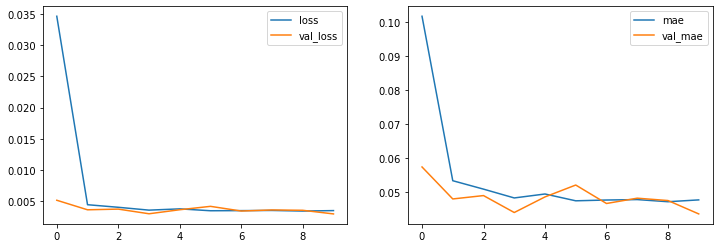

mse = 0.00296436, mae = 0.04346972


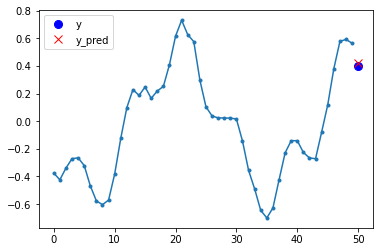

In [3]:
utils.reset_session()

model = keras.models.Sequential([
    keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
    keras.layers.SimpleRNN(20, return_sequences=True),
    keras.layers.SimpleRNN(1)
])

model.summary()

optimizer = keras.optimizers.Adam(lr=1e-2)
model.compile(loss='mse', optimizer=optimizer, metrics=['mae'])
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val))

utils.plot_history(history)

y_pred = model.predict(x_val)
utils.evaluate(y_val, y_pred[:, 0])

utils.plot_series(x_val[0], y_val[0], y_pred[0])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, None, 20)          440       
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 20)                820       
_________________________________________________________________
dense (Dense)                (None, 1)                 21        
Total params: 1,281
Trainable params: 1,281
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
219/219 [==============================] - 3s 15ms/step - loss: 0.0148 - mae: 0.0716 - val_loss: 0.0040 - val_mae: 0.0506
Epoch 2/10
219/219 [==============================] - 3s 13ms/step - loss: 0.0037 - mae: 0.0488 - val_loss: 0.0038 - val_mae: 0.0489
Epoch 3/10
219/219 [==============================] - 3s 13ms/step - loss: 0.0037 - mae: 0.0487 - val_loss: 0.0035 - v

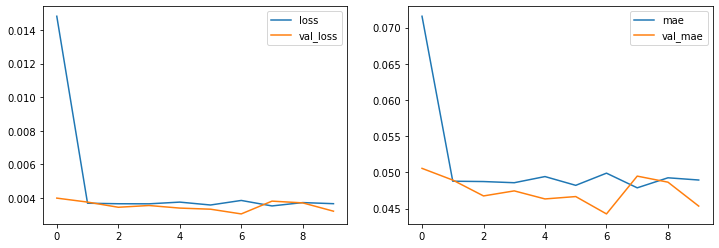

mse = 0.00322286, mae = 0.04534704


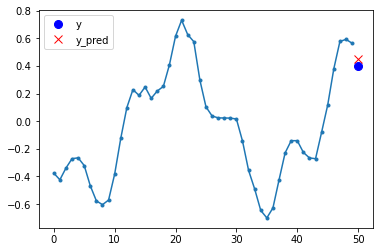

In [4]:
utils.reset_session()

model = keras.models.Sequential([
    keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
    keras.layers.SimpleRNN(20), # Do not set return_sequences 
    keras.layers.Dense(1)       # Use dense layer
])

model.summary()

optimizer = keras.optimizers.Adam(lr=1e-2)
model.compile(loss='mse', optimizer=optimizer, metrics=['mae'])
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val))

utils.plot_history(history)

y_pred = model.predict(x_val)
utils.evaluate(y_val, y_pred[:, 0])

utils.plot_series(x_val[0], y_val[0], y_pred[0])